___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# K Means Clustering with Python

This notebook is just a code reference for the video lecture and reading.

## Method Used

K Means Clustering is an unsupervised learning algorithm that tries to cluster data based on their similarity. Unsupervised learning means that there is no outcome to be predicted, and the algorithm just tries to find patterns in the data. In k means clustering, we have the specify the number of clusters we want the data to be grouped into. The algorithm randomly assigns each observation to a cluster, and finds the centroid of each cluster. Then, the algorithm iterates through two steps:
Reassign data points to the cluster whose centroid is closest. Calculate new centroid of each cluster. These two steps are repeated till the within cluster variation cannot be reduced any further. The within cluster variation is calculated as the sum of the euclidean distance between the data points and their respective cluster centroids.

## Import Libraries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Create some Data

In [22]:
from sklearn.datasets import make_blobs

In [23]:
# Create Data (this just creates "blob"-like samples of data we can use to test clustering methods on)
data = make_blobs(n_samples=200, n_features=2, 
                           centers=4, cluster_std=1.8,random_state=101)

In [24]:
data[0].shape #we have 200 samples of 2 features

(200, 2)

## Visualize Data

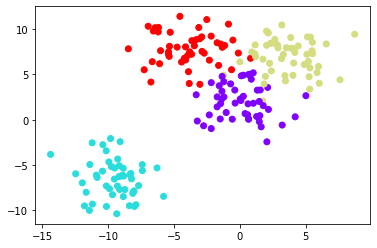

In [25]:
#plot out these blobs to explore
plt.scatter(x=data[0][:,0],y=data[0][:,1],c=data[1],cmap='rainbow')

## Creating the Clusters

In [31]:
from sklearn.cluster import KMeans

In [27]:
#we must select K - how many clusters do we expect (use cross-validation)
kmeans = KMeans(n_clusters = 4) #we know this from creating the data above

In [39]:
#use elbow method to identify k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data[0])
    distortions.append(kmeanModel.inertia_)

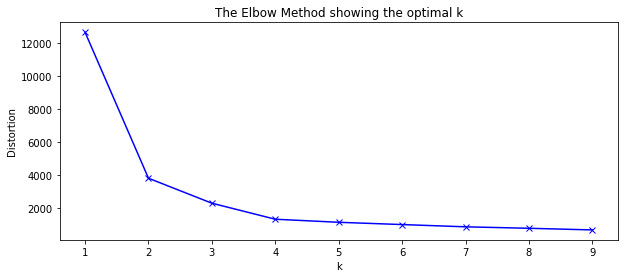

In [64]:
plt.figure(figsize=(10,4))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
#observations: indeed, appears to be 4 as the optimal k

In [32]:
kmeans.fit(data[0]) #in this case, features are just first column of our created data from above

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [33]:
kmeans.cluster_centers_
#will return an array of the resulting clusters

array([[-0.0123077 ,  2.13407664],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [ 3.71749226,  7.01388735]])

In [34]:
kmeans.labels_
#returns the predicted cluster labels

array([2, 3, 0, 3, 3, 1, 3, 0, 3, 0, 2, 0, 3, 3, 2, 0, 3, 0, 1, 2, 1, 0,
       0, 1, 2, 1, 1, 0, 3, 3, 2, 1, 3, 0, 0, 2, 1, 1, 1, 0, 1, 2, 2, 2,
       0, 3, 2, 0, 1, 0, 0, 2, 3, 0, 1, 2, 0, 0, 2, 3, 1, 3, 1, 2, 3, 0,
       1, 3, 3, 1, 3, 0, 1, 0, 1, 3, 3, 0, 2, 0, 0, 1, 3, 1, 0, 0, 0, 2,
       0, 1, 1, 1, 1, 0, 0, 1, 3, 2, 1, 3, 0, 1, 0, 0, 3, 0, 1, 3, 1, 1,
       3, 2, 2, 3, 1, 3, 2, 2, 3, 2, 0, 2, 0, 2, 0, 3, 2, 0, 1, 2, 2, 2,
       0, 1, 1, 2, 3, 2, 3, 0, 1, 3, 1, 2, 2, 3, 0, 1, 2, 2, 2, 2, 0, 3,
       0, 2, 3, 3, 3, 0, 3, 0, 0, 2, 1, 2, 0, 3, 2, 0, 3, 0, 2, 3, 0, 2,
       3, 3, 1, 3, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 3, 3, 2, 1, 0, 3, 3,
       1, 0])

In [45]:
#examine silhouette score
from sklearn.metrics import silhouette_score
silhouette_score(data[0], kmeans.labels_)
#observations: silhouette coefficient of 0.55 indicates pretty good accuracy
#in terms of identifying instances in their proper clusters (close to centroids)

0.5519773421333025

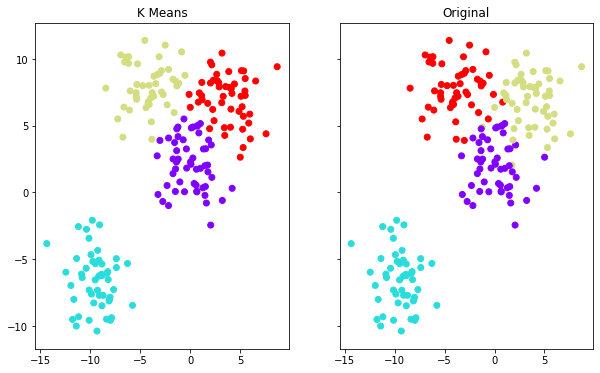

In [46]:
#IMPORTANT NOTE: You don't use K-Means clustering for prediction purposes...
#only in this scenario can we compare our algorithm's results to the actuals
#since we know what they are (we created the dataset in the intro)
#in typical practice, you are using K-Means in the first place because you have
#no information on what the actual cluster results are (unsupervised), hence
#you are using K-Means to get a better idea

#below we simply compare visually our K-Means vs the Original cluster df we created
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')
#observations: our K-Means is pretty spot on with the exception of a few "straggling" points in the top right quadrant (3 clusters there)

In [60]:
#can play around with the number of clusters
kmeans = KMeans(n_clusters = 7)

kmeans.fit(data[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [61]:
#examine silhouette score with k = 7 (we expect a worse result...)
from sklearn.metrics import silhouette_score
silhouette_score(data[0], kmeans.labels_)
#observations: we indeed see our silhouette coefficient drop from 0.55 to 0.37

0.36127960563359096

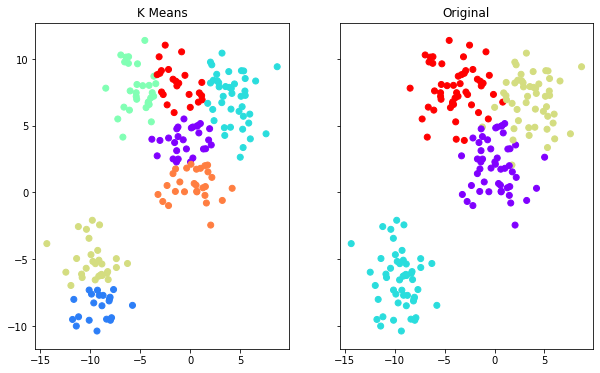

In [62]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(data[0][:,0],data[0][:,1],c=data[1],cmap='rainbow')

You should note, the colors are meaningless in reference between the two plots.

# Great Job!